# ALL Analysis

In [1]:
import sys
import os;os.chdir('../')
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint,load_config
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

In [2]:
conf=load_config('inputs/combined_collins.py')
conf['resman']=RESMAN(conf)
conf['resman'].get_residuals(conf['parman'].par);

loading sia data sets 100527

## Load Data from Files

In [3]:
ALL_SIA=pd.concat([pd.DataFrame(conf['resman'].siares.tabs[idx]) \
              for idx in conf['resman'].siares.tabs.keys()])
ALL_SIDIS=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys()])
ALL=pd.concat([ALL_SIA, ALL_SIDIS])
#ALL.columns

## Split Data
Organize data from different collaborations with different observables

In [4]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: BaBaR, Observerable: AUC-0-PT, Points: 9
Collaboration: BaBaR, Observerable: AUC-0-PT-INT, Points: 36
Collaboration: BaBaR, Observerable: AUL-0-PT, Points: 9
Collaboration: BaBaR, Observerable: AUL-0-PT-INT, Points: 36
Collaboration: HERMES, Observerable: AUTcollins, Points: 32
Collaboration: belle, Observerable: AUC-0-PT-INT, Points: 16
Collaboration: belle, Observerable: AUL-0-PT-INT, Points: 16
Collaboration: compass, Observerable: AUTcollins, Points: 74
Collaboration: hermes, Observerable: A_pretzelosity, Points: 41
Collaboration: jlab, Observerable: A_pretzelosity, Points: 8


## Start Plotting 
Below we plot the data vs. theory curves

In [5]:
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [6]:
# from the paper https://arxiv.org/pdf/1309.5278.pdf
z1_bins = np.array([0.15, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9])

In [7]:
def plot(data):

    n_col = 3
    n_row = len(z1_bins)/n_col + 1

    plt.figure(figsize=(4 *n_col, 3 *n_row))

    for index in range(len(z1_bins)-1):
        data_auc = data['AUC-0-PT-INT'].query('z1 > %f and z1 < %f' % (z1_bins[index], z1_bins[index+1]))
        data_aul = data['AUL-0-PT-INT'].query('z1 > %f and z1 < %f' % (z1_bins[index], z1_bins[index+1]))

        plt.subplot(n_row, n_col, index+1)
        plt.errorbar(data_auc.z2, data_auc.value, data_auc.alpha, 
                    marker='o', linestyle='', color='red', label='$A_{UC}$')
        plt.plot(data_auc.z2, data_auc.thy, linestyle='-', color='red')

        plt.errorbar(data_aul.z2, data_aul.value, data_aul.alpha, 
                    marker='o', linestyle='', color='blue', label='$A_{UL}$')
        plt.plot(data_aul.z2, data_aul.thy, linestyle='-', color='blue')
        plt.xlim([0.0, 1.0])
        plt.xlabel('$Z_2$')
        plt.title('$Z_1 \in [%.1f, %.1f]$' % (z1_bins[index], z1_bins[index+1]))
        
        # the legend has theory labels and I dont like them.
        if len(data_auc) > 0 and len(data_aul) > 0:
            handles, labels = plt.gca().get_legend_handles_labels()
            good_handles = []
            good_labels = []
            for handle, label in zip(handles, labels):
                if 'thy' not in label:
                    good_handles.append(handle)
                    good_labels.append(label)
            
            plt.legend(good_handles, good_labels, frameon=False, loc='topleft')
        
    plt.tight_layout()

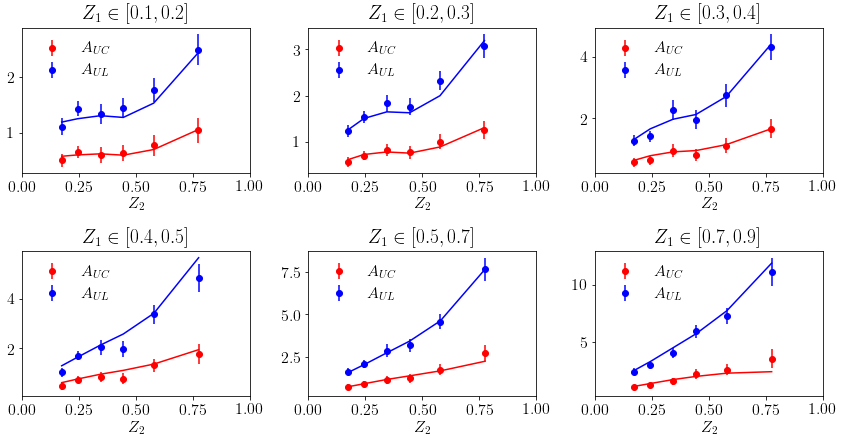

In [8]:
plot(data['BaBaR'])
plt.savefig('sia_babar.pdf')

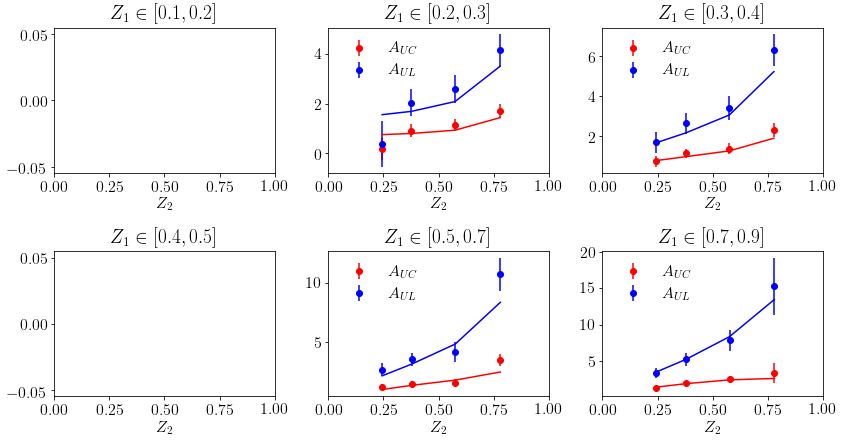

In [9]:
plot(data['belle'])
plt.savefig('sia_belle.pdf')

In [24]:
co = pd.concat([data['HERMES']['AUTcollins'], data['compass']['AUTcollins']])

keepers = ['obs', 'col', 'dependence', 'target', 'hadron', 'x', 'y', 'z', 'pT', 'value', 'alpha', 'thy']

for col in co.columns:
    if col not in keepers:
        co.drop(col, axis=1, inplace=True)

In [25]:
co

,alpha,col,dependence,hadron,obs,pT,target,thy,value,x,y,z
0,0.008028,HERMES,x,pi+,AUTcollins,0.3720,proton,0.011636,0.0036,0.0760,0.513,0.3670
1,0.007495,HERMES,x,pi+,AUTcollins,0.3560,proton,0.014751,0.0071,0.0980,0.484,0.3760
2,0.007228,HERMES,x,pi+,AUTcollins,0.3440,proton,0.019185,0.0279,0.1330,0.464,0.3790
3,0.009492,HERMES,x,pi+,AUTcollins,0.3390,proton,0.024886,0.0289,0.1860,0.449,0.3790
4,0.012997,HERMES,x,pi+,AUTcollins,0.3440,proton,0.033066,0.0150,0.2750,0.434,0.3750
0,0.010024,HERMES,z,pi+,AUTcollins,0.3460,proton,0.017115,0.0060,0.0860,0.592,0.2340
1,0.010234,HERMES,z,pi+,AUTcollins,0.3770,proton,0.016602,0.0067,0.0940,0.551,0.3030
2,0.010653,HERMES,z,pi+,AUTcollins,0.4030,proton,0.015470,0.0182,0.0970,0.528,0.3730
3,0.011102,HERMES,z,pi+,AUTcollins,0.4290,proton,0.014361,0.0106,0.0990,0.514,0.4470
4,0.012560,HERMES,z,pi+,AUTcollins,0.4530,proton,0.013009,0.0144,0.1000,0.504,0.5230


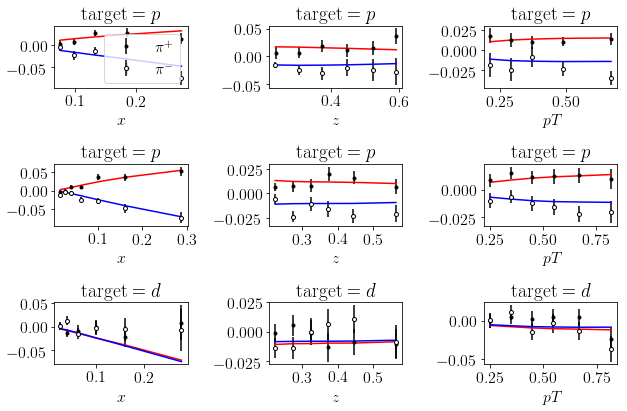

In [27]:
def plot_collins(ax,axis,col,tar):
    if axis=='pT':
        data_pip=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi+',col))
        data_pim=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi-',col))
        if len(data_pip.value)==0:
            data_pip=co.query('dependence=="pt" and target=="%s" and hadron=="%s" and col=="%s" '%(tar,'pi+',col))
            data_pim=co.query('dependence=="pt" and target=="%s" and hadron=="%s" and col=="%s" '%(tar,'pi-',col))
    else:
        data_pip=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi+',col))
        data_pim=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi-',col))
   
    sign=1
    if col=='compass': sign=-1
    ax.errorbar(data_pip[axis],sign*data_pip['value'],yerr=data_pip['alpha'],fmt='k.',label=r'$\pi^+$')
    ax.errorbar(data_pim[axis],sign*data_pim['value'],yerr=data_pim['alpha'],fmt='ko', mfc='white',label=r'$\pi^-$',markersize=4)

    ax.plot(data_pip[axis].values,sign*data_pip['thy'].values,'r-')
    ax.plot(data_pim[axis].values,sign*data_pim['thy'].values,'b-')

    if tar=='proton': star='p'
    if tar=='deuteron': star='d'
 
    ax.set_title(r'${\rm target}=%s$'%(star))
    ax.set_xlabel(r'$%s$'%axis)
    #if axis=='x': ax.set_ylim(-0.05,0.05)

nrows,ncols=3,3
py.figure(figsize=(ncols*3,nrows*2))

cnt=0
for col in ['HERMES','compass']:
    if col=='HERMES': targets=['proton']
    if col=='compass': targets=['proton','deuteron']   
    for tar in targets:
        for axis  in ['x','z','pT']:
            cnt+=1
            ax=py.subplot(nrows,ncols,cnt)
            plot_collins(ax,axis,col,tar)
            if cnt==1: ax.legend()
py.tight_layout()

In [29]:
pr = data['hermes']['A_pretzelosity']

keepers = ['obs', 'col', 'axis', 'target', 'hadron', 'x', 'y', 'z', 'pT', 'value', 'alpha', 'thy']

for col in pr.columns:
    if col not in keepers:
        pr.drop(col, axis=1, inplace=True)

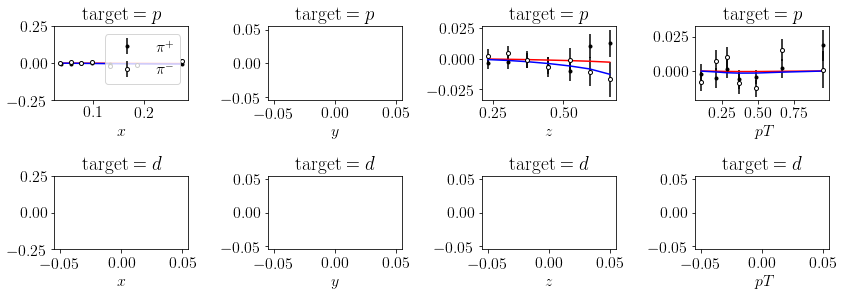

In [30]:
def plot_transversity(ax,axis,tar):
    data_pip=pr.query('axis=="%s" and target=="%s" and hadron=="%s" '%(axis,tar,'pi+'))
    data_pim=pr.query('axis=="%s" and target=="%s" and hadron=="%s" '%(axis,tar,'pi-'))
    if axis=='pt': axis='pT'
    ax.errorbar(data_pip[axis],data_pip['value'],yerr=data_pip['alpha'],fmt='k.',label=r'$\pi^+$')
    ax.errorbar(data_pim[axis],data_pim['value'],yerr=data_pim['alpha'],fmt='ko', mfc='white',label=r'$\pi^-$',markersize=4)

    ax.plot(data_pip[axis].values,data_pip['thy'].values,'r-')
    ax.plot(data_pim[axis].values,data_pim['thy'].values,'b-')

    if tar=='proton': star='p'
    if tar=='neutron': star='d'
 
    ax.set_title(r'${\rm target}=%s$'%(star))
    ax.set_xlabel(r'$%s$'%axis)
    if axis=='x': ax.set_ylim(-0.25,0.25)

nrows,ncols=4,4
py.figure(figsize=(ncols*3,nrows*2))

cnt=0
for tar in ['proton','neutron']:
    for axis  in ['x','y','z','pT']:
        cnt+=1
        ax=py.subplot(nrows,ncols,cnt)
        plot_transversity(ax,axis,tar)
        if cnt==1: ax.legend()
py.tight_layout()